In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

df = pd.read_csv('E:\Tanishq\Jupyter\Coding_Blocks\Datasets\Air_Quality_Index\Train\Train.csv')
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [2]:
X = df.drop(columns = ['target'],inplace = False)
y = df['target']

In [3]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [4]:
y.shape

(1600,)

In [5]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# X = scaler.fit_transform(X)

In [6]:
X

array([[ 0.29341624, -0.94559871, -0.42110515,  0.40681602,  0.52566183],
       [-0.83608408, -0.18922804, -0.77640262, -1.05383124,  0.59799685],
       [ 0.23642511,  0.13283602, -0.14772298,  0.69985396, -0.18736416],
       ...,
       [ 1.04417694, -0.89920649,  1.73039905, -1.87105676,  0.44251965],
       [-1.2691729 , -0.00505216,  1.85766873, -1.08036482,  0.73633394],
       [-1.88400025, -0.84942743, -1.45227035,  0.48861308,  1.4595758 ]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [8]:
X_train.shape

(1200, 5)

In [9]:
y_test.shape

(400,)

In [10]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9623072569556467

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.96186404, 0.9663462 , 0.96422671, 0.96739169, 0.95920696])

In [12]:
# although the accuracy is pretty great but still testing other methods

In [13]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model

,model,best_score,best_params
0,linear_regression,0.963807,{'normalize': True}
1,lasso,0.963567,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.867649,"{'criterion': 'mse', 'splitter': 'best'}"


In [14]:
# So linear regression is showing the best score

In [15]:
# Defining the predict function

def predict_price(feature_1,feature_2,feature_3,feature_4,feature_5):    
    

    x = np.zeros(X.shape[1])
    x[0] = feature_1
    x[1] = feature_2
    x[2] = feature_3
    x[3] = feature_4
    x[4] = feature_5


    return lr_clf.predict([x])[0]

In [16]:
predict_price(X[2][0],X[2][1],X[2][2],X[2][3],X[2][4])
#X[0][0]

53.6995646883675

In [17]:
y_predicted = []
for i in range(X.shape[0]):
    y_p = predict_price(X[i][0],X[i][1],X[i][2],X[i][3],X[i][4])
    y_predicted.append(y_p)
    
y_predicted

[-58.775727276624984,
 -88.93813618257113,
 53.6995646883675,
 10.011211124528945,
 -44.90815556795663,
 -134.1679847879556,
 26.753627137727655,
 -32.01584955528207,
 18.006682628460226,
 -87.90778711779546,
 -44.500401220216965,
 71.90740496606603,
 -103.29429382344175,
 -137.1355583902131,
 -152.69842114024942,
 37.46153994423687,
 -77.87446880289346,
 -42.62722578934989,
 57.30230435955776,
 73.23600796149293,
 -51.52499774898973,
 235.27785446360997,
 -160.03425730356392,
 -149.84970907282084,
 202.28278965666914,
 165.34964000953525,
 -13.949807985279865,
 -15.814049369972508,
 -77.01838121454192,
 236.0297436610203,
 -153.34816333263728,
 -138.28794861666498,
 35.892756246648936,
 -34.21311571175484,
 -139.12057390752966,
 95.01101378695996,
 -90.39881852692453,
 210.8514537188885,
 53.48131143208497,
 -123.25118571564991,
 -95.14153347188304,
 -154.37267934969003,
 9.747019380283096,
 -110.28531600169129,
 -192.157974216592,
 -103.02288009531229,
 -337.09632739766727,
 12.45451

In [18]:
y_predicted = np.array(y_predicted)
y_predicted

array([ -58.77572728,  -88.93813618,   53.69956469, ..., -115.79263593,
        -62.97460973, -116.12439889])

In [19]:
X.shape

(1600, 5)

In [20]:
lr_clf.predict(X_test)

array([ 1.44203414e+02,  3.69591467e+01,  5.96958039e+00, -3.84089485e+01,
        9.70634138e+01,  3.90474069e+01, -7.53128039e+01, -5.74463963e+01,
        1.41018640e+02, -1.18786365e+02,  1.49055422e+02,  5.73051885e+00,
       -1.80945059e+01,  6.86841801e+00,  8.67610246e+01, -7.29103099e+01,
       -1.15305485e+02,  1.11971633e+02, -5.24790008e+01, -1.35809735e+02,
       -7.77568462e+01,  5.73023044e+01, -9.16709624e+01, -9.42651212e-01,
       -1.63547783e+02,  7.55340971e+01, -1.37860084e+01, -3.09226790e+02,
       -1.15792636e+02, -1.90428176e+01, -1.38079765e+02,  3.98753390e+01,
        1.23723222e+02,  1.09072866e+02, -1.32922183e+01, -1.40714860e+00,
        5.34301323e+01,  4.52799820e+01, -5.06736474e+00, -7.24316354e+01,
       -6.02383730e+01,  1.03022340e+02,  5.97547716e+01,  1.50567895e+02,
       -1.13231485e+01, -1.14705083e+02, -3.47292423e+01, -1.45129413e+02,
       -7.04873710e+01,  1.48423738e+02, -1.30320739e+02,  1.56125355e+02,
       -1.80257217e+02, -

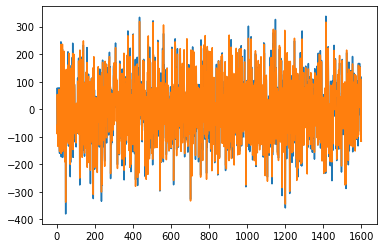

In [21]:
import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(y_predicted)

In [22]:
y

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [23]:
y_predicted

array([ -58.77572728,  -88.93813618,   53.69956469, ..., -115.79263593,
        -62.97460973, -116.12439889])